In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from clyent import color
from scipy.stats import linregress
import libraries as lib

In [2]:
directory = "C:/Users\qvled\OneDrive - HvA\Logfiles\H2A/2023/Nogaro/20230525_h2a_poging1/0002/"
    #"../../HvA/CleanMobility - E-team/Logfiles/H2A/2023/Nogaro/20230525_h2a_poging1/0002/"
file_master = "1.csv"
file_motordriver ="5.csv"
file_FCC = "4.csv"
file_richting = "F.csv"

In [3]:
data_file_motordriver = lib.DataInladenMotorDriver(f'{directory}{file_motordriver}')
data_file_master = lib.DataInladen(f'{directory}{file_master}')
data_file_FCC = lib.DataInladenFCC(f'{directory}{file_FCC}')
data_file_richting = lib.DataInladen(f'{directory}{file_richting}')

In [4]:
data_file_motordriver["GPS longitude, in graden"] = data_file_motordriver["GPS longitude, in graden"]* -1
data_file_motordriver

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Huidig stroom-instelpunt van cruise control,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum
0,5,252.6246,03|04,0.0060,2.725,-0.003,-0.1,0,3.034,-0.000,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,5,252.6305,03|04,0.0118,4.996,-0.006,-0.1,0,5.562,0.008,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,5,252.6362,03|04,0.0176,7.028,-0.008,-0.2,0,7.823,0.018,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,5,252.6420,03|04,0.0234,8.845,-0.010,-0.2,0,9.846,0.028,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,252.6478,03|04,0.0292,10.471,-0.010,-0.2,0,11.655,0.033,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496050,5,6919.3279,03|04,3277.5222,0.039,0.114,0.0,181490,9.762,0.111,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496051,5,6919.3363,03|04,3277.5308,0.039,0.122,0.0,181490,9.371,0.114,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496052,5,6919.3448,03|04,3277.5393,0.040,0.129,0.0,181490,8.970,0.119,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496053,5,6919.3533,03|04,3277.5479,0.040,0.141,0.0,181490,8.543,0.124,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN


In [5]:
# Versnelling berekenen met behulp van het verschil in snelheid en tijd
dt = data_file_motordriver.iloc[:, 1]
dsnelheid = data_file_motordriver.iloc[:, 30] /3.6  # Omrekenen van km/h naar m/s

# Nieuwe kolom toevoegen aan dataframe
data_file_motordriver['Versnelling (m/s**2)'] = dsnelheid/dt

data_file_motordriver

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum,Versnelling (m/s**2)
0,5,252.6246,03|04,0.0060,2.725,-0.003,-0.1,0,3.034,-0.000,...,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,252.6305,03|04,0.0118,4.996,-0.006,-0.1,0,5.562,0.008,...,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,252.6362,03|04,0.0176,7.028,-0.008,-0.2,0,7.823,0.018,...,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,252.6420,03|04,0.0234,8.845,-0.010,-0.2,0,9.846,0.028,...,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,252.6478,03|04,0.0292,10.471,-0.010,-0.2,0,11.655,0.033,...,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496050,5,6919.3279,03|04,3277.5222,0.039,0.114,0.0,181490,9.762,0.111,...,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN,0.000060
496051,5,6919.3363,03|04,3277.5308,0.039,0.122,0.0,181490,9.371,0.114,...,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN,0.000060
496052,5,6919.3448,03|04,3277.5393,0.040,0.129,0.0,181490,8.970,0.119,...,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN,0.000060
496053,5,6919.3533,03|04,3277.5479,0.040,0.141,0.0,181490,8.543,0.124,...,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN,0.000060


In [6]:

gevonden = False
finish_rijen = np.array([])

lat_min, lat_max = -2.4250, -2.4225
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 

# Kolomnamen
yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
afstand_rondje = 1588.84925219  # Afstand van een rondje in meters

# Filter rows where latitude, longitude, and the distance are non-zero
data_file_motordriver = data_file_motordriver[data_file_motordriver[xas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[yas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver['Afgelegde afstand sinds laatste herstart motordriver (m)'] != 0]

# Itereer over elke rij in de DataFrame
for i in range(len(data_file_motordriver)):
    lat = data_file_motordriver[xas].iloc[i]  # Latitude van de i-de rij
    lon = data_file_motordriver[yas].iloc[i]  # Longitude van de i-de rij
    afstand = data_file_motordriver["Afgelegde afstand sinds laatste herstart motordriver (m)"].iloc[i]

    # Controleer of het punt binnen het vierkant valt
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        if not gevonden:  # Voeg alleen toe als dit de eerste keer is dat we het punt vinden
            finish_rijen = np.append(finish_rijen, i)
            gevonden = True  # Vlag op 'gevonden' zetten
            start_afstand = afstand  # Opslaan van de startafstand bij het eerste punt

    # Controleer of de afgelegde afstand groter is dan een volledige ronde
    if gevonden and afstand >= start_afstand + (afstand_rondje * (len(finish_rijen))):
        finish_rijen = np.append(finish_rijen, i)

print(finish_rijen)
afstanden = np.array([])  # Maak een lege array voor afstanden



[186406. 209641. 234548. 260355. 284887. 310007. 334643. 360363. 386167.
 415649.]


In [14]:
begin_eind_paren2 = [
    (0, 186406), 
    (186406, 209641), 
    (209641, 234548), 
    (234548, 260355),
    (260355, 284887), 
    (284887, 310007), 
    (310007, 334643), 
    (334643, 360363),
    (360363, 386167), 
    (386167, 415649)
]

# Maak een lege lijst om de rondes-dataframes op te slaan
rondes = []


# Loop door elke (begin, eind) paar en maak een DataFrame subset
for i, (begin, eind) in enumerate(begin_eind_paren2):
    df_segment = data_file_motordriver.iloc[begin:eind]
    rondes.append(df_segment)

# Je kunt nu elke ronde benaderen als rondes[0], rondes[1], etc.
df_ronde1 = rondes[0]
df_ronde2 = rondes[1]
df_ronde3 = rondes[2]
df_ronde4 = rondes[3]
df_ronde5 = rondes[4]
df_ronde6 = rondes[5]
df_ronde7 = rondes[6]
df_ronde8 = rondes[7]
df_ronde9 = rondes[8]
df_ronde10 = rondes[9]

df_ronde4

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum,Versnelling (m/s**2)
297650,5,5179.4872,03|04,1537.9832,19.974,8.031,170.2,60377,28.594,6.098,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297651,5,5179.4960,03|04,1537.9918,20.097,8.081,172.8,60379,28.594,6.096,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297652,5,5179.5047,03|04,1538.0006,19.236,7.937,165.4,60380,28.592,6.100,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297653,5,5179.5135,03|04,1538.0094,19.573,8.014,169.1,60382,28.592,6.090,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297654,5,5179.5222,03|04,1538.0182,18.857,8.011,164.3,60383,28.591,6.105,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323452,5,5403.5042,03|04,1761.9614,19.927,8.016,172.1,78356,27.842,6.418,...,28.224,0,1738.094,-2.4346,4346.2436,324.2,24.8,75320.8,NaN,0.001275
323453,5,5403.5129,03|04,1761.9702,20.059,8.037,173.6,78357,27.840,6.427,...,28.224,0,1738.094,-2.4346,4346.2436,324.2,24.8,75320.8,NaN,0.001275
323454,5,5403.5217,03|04,1761.9788,19.922,8.008,172.8,78359,27.839,6.431,...,28.224,0,1738.094,-2.4346,4346.2436,324.2,24.8,75320.8,NaN,0.001275
323455,5,5403.5304,03|04,1761.9875,20.025,8.040,173.5,78360,27.837,6.434,...,28.224,0,1738.094,-2.4346,4346.2436,324.2,24.8,75320.8,NaN,0.001275


In [84]:
# Maak een lijst om de rondetijden op te slaan
rondetijden = []
# Bereken de rondetijd voor elke ronde
tijd_kolom_index = 1  # Index van de kolom met de tijd
for df_ronde in rondes:
    begin_tijd = df_ronde.iloc[0, tijd_kolom_index]
    eind_tijd = df_ronde.iloc[-1, tijd_kolom_index]
    rondetijd = round(eind_tijd - begin_tijd, 1)
    rondetijden.append(rondetijd)

# Overzichtelijke output van de rondetijden
for i, tijd in enumerate(rondetijden, start=1):
    print(f"Rondetijd ronde {i}: {tijd:.1f} seconden")

Rondetijd ronde 1: 4186.1 seconden
Rondetijd ronde 2: 202.0 seconden
Rondetijd ronde 3: 216.2 seconden
Rondetijd ronde 4: 224.1 seconden
Rondetijd ronde 5: 213.6 seconden
Rondetijd ronde 6: 220.4 seconden
Rondetijd ronde 7: 217.1 seconden
Rondetijd ronde 8: 226.9 seconden
Rondetijd ronde 9: 227.7 seconden
Rondetijd ronde 10: 259.5 seconden


In [74]:
gemiddelde_snelheid_data = []
snelheid_gps_index = 30  # Wielsnelheid, in km/h

# Loop door elke ronde en bereken de gemiddelde snelheid (filter het eerste rondje eruit)
for idx, df_ronde in enumerate(rondes[1:], start=2):
    snelheden = df_ronde.iloc[:, snelheid_gps_index]
    geldige_snelheden = snelheden[snelheden != 0]
    gemiddelde_snelheid = round(geldige_snelheden.mean(), 1) if not geldige_snelheden.empty else None
    gemiddelde_snelheid_data.append((idx, gemiddelde_snelheid))

# Overzichtelijke output van gemiddelde snelheid per ronde
for ronde, snelheid in gemiddelde_snelheid_data:
    if snelheid is not None:
        print(f"Ronde {ronde}: Gemiddelde snelheid was {snelheid:.1f} km/h")
    else:
        print(f"Ronde {ronde}: Geen data beschikbaar voor snelheid")

# Visualisatie van gemiddelde snelheid per ronde
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar([f'Ronde {ronde}' for ronde, snelheid in gemiddelde_snelheid_data if snelheid is not None],
        [snelheid for ronde, snelheid in gemiddelde_snelheid_data if snelheid is not None],
        color='blue', alpha=0.6)
plt.xlabel('Ronde')
plt.ylabel('Gemiddelde Snelheid (km/h)')
plt.title('Gemiddelde Snelheid per Ronde')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ronde 2: Gemiddelde snelheid was 28.2 km/h
Ronde 3: Gemiddelde snelheid was 26.3 km/h
Ronde 4: Gemiddelde snelheid was 25.4 km/h
Ronde 5: Gemiddelde snelheid was 26.6 km/h
Ronde 6: Gemiddelde snelheid was 25.8 km/h
Ronde 7: Gemiddelde snelheid was 26.2 km/h
Ronde 8: Gemiddelde snelheid was 25.1 km/h
Ronde 9: Gemiddelde snelheid was 25.0 km/h
Ronde 10: Gemiddelde snelheid was 23.5 km/h


In [59]:
# Balkendiagram van rondetijden
%matplotlib qt
plt.figure(figsize=(10, 6))
plt.bar(range(2, len(rondetijden) + 1), rondetijden[1:], color='skyblue')
plt.xlabel('Ronde')
plt.ylabel('Rondetijd (seconden)')
plt.title('Rondetijden per Ronde')
plt.xticks(range(2, len(rondetijden) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Maak een lijst om de energie per rondje op te slaan
energie_per_rondje = []

# Bereken de energieverandering voor elke ronde
energie_kolom_index = 11  # Index van de kolom met de energie
for df_ronde in rondes:
    begin_energie = df_ronde.iloc[0, energie_kolom_index]
    eind_energie = df_ronde.iloc[-1, energie_kolom_index]
    energie = round(eind_energie - begin_energie, 1)
    energie_per_rondje.append(energie)

# Overzichtelijke output van de energie per rondje
for i, energie in enumerate(energie_per_rondje, start=1):
    print(f"Energie rondje {i}: {energie:.1f} Joules")

Energie rondje 1: 24367.0 Joules
Energie rondje 2: 24118.0 Joules
Energie rondje 3: 17628.0 Joules
Energie rondje 4: 19097.0 Joules
Energie rondje 5: 19259.0 Joules
Energie rondje 6: 18442.0 Joules
Energie rondje 7: 18723.0 Joules
Energie rondje 8: 17379.0 Joules
Energie rondje 9: 18271.0 Joules
Energie rondje 10: 16033.0 Joules


In [37]:
# Maak een balkendiagram van de energie per ronde
plt.figure(figsize=(10, 6))
plt.bar(range(2, len(energie_per_rondje) + 1), energie_per_rondje[1:], color='lightgreen')
plt.xlabel('Ronde')
plt.ylabel('Energie (Joules)')
plt.title('Energieverbruik per Ronde')
plt.xticks(range(2, len(energie_per_rondje) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
# Maak een balkendiagram met een dubbele Y-as voor de rondetijden en energie per ronde
fig, ax1 = plt.subplots(figsize=(10, 6))

# Rondetijden plotten
ax1.set_xlabel('Ronde')
ax1.set_ylabel('Rondetijd (seconden)', color='skyblue')
ax1.bar(range(2, len(rondetijden) + 1), rondetijden[1:], color='skyblue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Tweede Y-as voor energie
ax2 = ax1.twinx()
ax2.set_ylabel('Energie (Joules)', color='red')
ax2.plot(range(2, len(energie_per_rondje) + 1), energie_per_rondje[1:], color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='red')

# Titel en X-as instellingen
plt.title('Rondetijden en Energieverbruik per Ronde')
plt.xticks(range(2, len(rondetijden) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [39]:
# Maak een balkendiagram van de rondetijden van rondje 2 tot 9 met een horizontale lijn op het gemiddelde
rondetijden_2_9 = rondetijden[1:9]
gemiddelde_rondetijd = round(sum(rondetijden_2_9) / len(rondetijden_2_9), 1)

plt.figure(figsize=(10, 6))
plt.bar(range(2, 10), rondetijden_2_9, color='skyblue', alpha=0.6)
plt.axhline(y=gemiddelde_rondetijd, color='red', linestyle='--')
plt.text(2, gemiddelde_rondetijd + 1, f'Gemiddelde: {gemiddelde_rondetijd:.1f} s', color='red', fontsize=12)
plt.xlabel('Ronde')
plt.ylabel('Rondetijd (seconden)')
plt.title('Rondetijden van Ronde 2 tot 9 met Gemiddelde')
plt.xticks(range(2, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [76]:
# Maak scatter plots voor elke ronde met GPS-data vs. snelheid
for idx, df_segment in enumerate(rondes):
    # Filter de data voor alleen geldige waarden
    df_segment = df_segment[(df_segment['GPS longitude, in graden'] != 0) &
                            (df_segment['GPS latitude, in graden'] != 0) &
                            (df_segment['Wielsnelheid, in km/h'] != 0)]
    
    # Maak een figuur voor elke ronde
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_segment['GPS longitude, in graden'], df_segment['GPS latitude, in graden'], 
                          c=df_segment['Wielsnelheid, in km/h'], cmap='viridis')
    
    # Titel en labels
    plt.title(f'GPS Data vs Speed - Ronde {idx + 1}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Kleurstaaf toevoegen
    cbar = plt.colorbar(scatter)
    cbar.set_label('Speed (km/h)')
    
    # Toon de plot in een nieuw venster
    plt.grid(True)
    plt.show()

In [85]:
# Vermogen en energie per ronde analyseren
vermogen_motor_index = 6  # Index van de kolom met vermogen geleverd aan de motor
vermogen_motordriver_index = 10  # Index van de kolom met vermogen geleverd aan de hele motordriver

for idx, df_ronde in enumerate(rondes):
    # Plot energie per gereden meter
    plt.figure(figsize=(12, 6))
    afstand_kolom_index = 16  # Index van de kolom met afgelegde afstand
    energie_motor = df_ronde.iloc[:, energie_kolom_index]
    afgelegde_afstand = df_ronde.iloc[:, afstand_kolom_index]
    energie_per_meter = energie_motor / afgelegde_afstand
    plt.plot(afgelegde_afstand, energie_per_meter, label='Energie per Meter (J/m)', color='red')
    
        # Titel en labels
    plt.title(f'Energie per Meter - Ronde {idx + 1}')
    plt.xlabel('Afgelegde Afstand (m)')
    plt.ylabel('Energie per Meter (J/m)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [78]:
for idx, df_ronde in enumerate(rondes):
        # Plot vermogen geleverd aan de motor over tijd
    plt.figure(figsize=(12, 6))
    plt.plot(df_ronde['Dataloggertijd, in s'], df_ronde.iloc[:, vermogen_motor_index], label='Vermogen aan Motor (W)', color='blue')
    plt.plot(df_ronde['Dataloggertijd, in s'], df_ronde.iloc[:, vermogen_motordriver_index], label='Vermogen aan Motordriver (W)', color='green')
    
    # Titel en labels
    plt.title(f'Vermogen over Tijd - Ronde {idx + 1}')
    plt.xlabel('Tijd (s)')
    plt.ylabel('Vermogen (W)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
# Cruise Control Analyse

# Lijst om cruise control data per ronde op te slaan
cruise_control_data = []

# Indexen van relevante kolommen
cruise_control_status_index = 21  # Toestand CruiseControll knop
cruise_control_speed_index = 24    # Doelsnelheid van de cruise control

# Loop door elke ronde en analyseer cruise control gegevens
for idx, df_ronde in enumerate(rondes):
    # Filter alleen de rijen waar cruise control actief is
    df_cruise_active = df_ronde[df_ronde.iloc[:, cruise_control_status_index] == 1]
    
    # Check of er data is met actieve cruise control
    if not df_cruise_active.empty:
        gemiddelde_snelheid_cruise = df_cruise_active.iloc[:, cruise_control_speed_index].mean()
        cruise_control_data.append((idx + 1, gemiddelde_snelheid_cruise))
    else:
        cruise_control_data.append((idx + 1, None))

# Overzichtelijke output van cruise control analyse
for ronde, snelheid in cruise_control_data:
    if snelheid is not None:
        print(f"Ronde {ronde}: Gemiddelde doelsnelheid cruise control was {snelheid:.1f} km/h")
    else:
        print(f"Ronde {ronde}: Geen gebruik van cruise control")

# Impact van cruise control op rondetijden en energieverbruik analyseren
cruise_control_rondetijden = []
cruise_control_energie = []

for i, (ronde, snelheid) in enumerate(cruise_control_data):
    if snelheid is not None:
        cruise_control_rondetijden.append(rondetijden[i])
        cruise_control_energie.append(energie_per_rondje[i])

if cruise_control_rondetijden:
    gemiddelde_rondetijd_cruise = round(sum(cruise_control_rondetijden) / len(cruise_control_rondetijden), 1)
    gemiddelde_energie_cruise = round(sum(cruise_control_energie) / len(cruise_control_energie), 1)
    print(f"Gemiddelde rondetijd met cruise control: {gemiddelde_rondetijd_cruise} seconden")
    print(f"Gemiddeld energieverbruik met cruise control: {gemiddelde_energie_cruise} Joules")
else:
    print("Geen gebruik van cruise control gedurende de rondes")

Ronde 1: Geen gebruik van cruise control
Ronde 2: Geen gebruik van cruise control
Ronde 3: Geen gebruik van cruise control
Ronde 4: Geen gebruik van cruise control
Ronde 5: Geen gebruik van cruise control
Ronde 6: Geen gebruik van cruise control
Ronde 7: Geen gebruik van cruise control
Ronde 8: Geen gebruik van cruise control
Ronde 9: Geen gebruik van cruise control
Ronde 10: Geen gebruik van cruise control
Geen gebruik van cruise control gedurende de rondes


In [70]:
# Motor Efficiëntie Analyse met 1e rondje

# Lijst om motor efficiëntie data per ronde op te slaan
motor_efficiency_data = []

# Indexen van relevante kolommen
spanning_motor_index = 4  # Spanning over de motor, in V
stroom_motor_index = 5    # Stroom door de motor, in A
snelheid_wiel_index = 16  # Wielsnelheid, in km/h

def bereken_efficiëntie(spanning, stroom, snelheid):
    if stroom != 0 and snelheid != 0:
        return (spanning * stroom) / snelheid
    return None

# Loop door elke ronde en analyseer motor efficiëntie
for idx, df_ronde in enumerate(rondes):
    efficiënties = []
    for _, row in df_ronde.iterrows():
        spanning = row.iloc[spanning_motor_index]
        stroom = row.iloc[stroom_motor_index]
        snelheid = row.iloc[snelheid_wiel_index]
        efficiëntie = bereken_efficiëntie(spanning, stroom, snelheid)
        if efficiëntie is not None:
            efficiënties.append(efficiëntie)
    
    gemiddelde_efficiëntie = round(sum(efficiënties) / len(efficiënties), 3) if efficiënties else None
    motor_efficiency_data.append((idx + 1, gemiddelde_efficiëntie))

# Overzichtelijke output van motor efficiëntie analyse
for ronde, efficiëntie in motor_efficiency_data:
    if efficiëntie is not None:
        print(f"Ronde {ronde}: Gemiddelde efficiëntie van de motor was {efficiëntie:.3f}")
    else:
        print(f"Ronde {ronde}: Geen data beschikbaar voor efficiëntie")

# Visualisatie van motor efficiëntie per ronde
plt.figure(figsize=(10, 6))
plt.bar([f'Ronde {ronde}' for ronde, efficiëntie in motor_efficiency_data if efficiëntie is not None],
        [efficiëntie for ronde, efficiëntie in motor_efficiency_data if efficiëntie is not None],
        color='orange', alpha=0.6)
plt.xlabel('Ronde')
plt.ylabel('Gemiddelde Efficiëntie (V * A / km/h)')
plt.title('Gemiddelde Motor Efficiëntie per Ronde')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ronde 1: Gemiddelde efficiëntie van de motor was -1.512
Ronde 2: Gemiddelde efficiëntie van de motor was 0.052
Ronde 3: Gemiddelde efficiëntie van de motor was 0.020
Ronde 4: Gemiddelde efficiëntie van de motor was 0.014
Ronde 5: Gemiddelde efficiëntie van de motor was 0.011
Ronde 6: Gemiddelde efficiëntie van de motor was 0.009
Ronde 7: Gemiddelde efficiëntie van de motor was 0.008
Ronde 8: Gemiddelde efficiëntie van de motor was 0.006
Ronde 9: Gemiddelde efficiëntie van de motor was 0.005
Ronde 10: Gemiddelde efficiëntie van de motor was 0.004


In [71]:
# Motor Efficiëntie Analyse zonder 1e rondje

# Lijst om motor efficiëntie data per ronde op te slaan
motor_efficiency_data = []

# Indexen van relevante kolommen
spanning_motor_index = 4  # Spanning over de motor, in V
stroom_motor_index = 5    # Stroom door de motor, in A
snelheid_wiel_index = 30  # Wielsnelheid, in km/h
snelheid_gps = 16

def bereken_efficiëntie(spanning, stroom, snelheid):
    if stroom != 0 and snelheid != 0:
        return (spanning * stroom) / (snelheid)
    return None

# Loop door elke ronde en analyseer motor efficiëntie (filter het eerste rondje eruit)
for idx, df_ronde in enumerate(rondes[1:], start=2):
    efficiënties = []
    for _, row in df_ronde.iterrows():
        spanning = row.iloc[spanning_motor_index]
        stroom = row.iloc[stroom_motor_index]
        snelheid = row.iloc[snelheid_wiel_index]
        efficiëntie = bereken_efficiëntie(spanning, stroom, snelheid)
        if efficiëntie is not None:
            efficiënties.append(efficiëntie)
    
    gemiddelde_efficiëntie = round(sum(efficiënties) / len(efficiënties), 3) if efficiënties else None
    motor_efficiency_data.append((idx, gemiddelde_efficiëntie))

# Overzichtelijke output van motor efficiëntie analyse
for ronde, efficiëntie in motor_efficiency_data:
    if efficiëntie is not None:
        print(f"Ronde {ronde}: Gemiddelde efficiëntie van de motor was {efficiëntie:.3f}")
    else:
        print(f"Ronde {ronde}: Geen data beschikbaar voor efficiëntie")

# Visualisatie van motor efficiëntie per ronde
plt.figure(figsize=(10, 6))
plt.bar([f'Ronde {ronde}' for ronde, efficiëntie in motor_efficiency_data if efficiëntie is not None],
        [efficiëntie for ronde, efficiëntie in motor_efficiency_data if efficiëntie is not None],
        color='orange', alpha=0.6)
plt.xlabel('Ronde')
plt.ylabel('Gemiddelde Efficiëntie (V * A / km/h)')
plt.title('Gemiddelde Motor Efficiëntie per Ronde')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ronde 2: Gemiddelde efficiëntie van de motor was 4.241
Ronde 3: Gemiddelde efficiëntie van de motor was 2.858
Ronde 4: Gemiddelde efficiëntie van de motor was 3.277
Ronde 5: Gemiddelde efficiëntie van de motor was 3.348
Ronde 6: Gemiddelde efficiëntie van de motor was 3.271
Ronde 7: Gemiddelde efficiëntie van de motor was 3.149
Ronde 8: Gemiddelde efficiëntie van de motor was 2.995
Ronde 9: Gemiddelde efficiëntie van de motor was 3.106
Ronde 10: Gemiddelde efficiëntie van de motor was 2.578


In [87]:
# Vermogen per Afstand Analyse zonder 1e rondje

# Lijst om vermogen per afstand data per ronde op te slaan
power_per_distance_data = []

# Indexen van relevante kolommen
vermogen_motor_index = 10  # Vermogen geleverd aan de motor, in W
afstand_index = 16         # Afgelegde afstand, in m

# Loop door elke ronde en analyseer vermogen per afstand (filter het eerste rondje eruit)
for idx, df_ronde in enumerate(rondes[1:], start=2):
    vermogen_per_afstand = []
    for _, row in df_ronde.iterrows():
        vermogen = row.iloc[vermogen_motor_index]
        afstand = row.iloc[afstand_index]
        if afstand != 0:
            vermogen_afstand = vermogen / afstand
            vermogen_per_afstand.append(vermogen_afstand)
    
    gemiddelde_vermogen_per_afstand = round(sum(vermogen_per_afstand) / len(vermogen_per_afstand), 3) if vermogen_per_afstand else None
    power_per_distance_data.append((idx, gemiddelde_vermogen_per_afstand))

# Overzichtelijke output van vermogen per afstand analyse
for ronde, vermogen_per_afstand in power_per_distance_data:
    if vermogen_per_afstand is not None:
        print(f"Ronde {ronde}: Gemiddeld vermogen per afstand was {vermogen_per_afstand:.3f} W/m")
    else:
        print(f"Ronde {ronde}: Geen data beschikbaar voor vermogen per afstand")

# Visualisatie van vermogen per afstand per ronde
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar([f'Ronde {ronde}' for ronde, vermogen_per_afstand in power_per_distance_data if vermogen_per_afstand is not None],
        [vermogen_per_afstand for ronde, vermogen_per_afstand in power_per_distance_data if vermogen_per_afstand is not None],
        color='green', alpha=0.6)
plt.xlabel('Ronde')
plt.ylabel('Gemiddeld Vermogen per Afstand (W/m)')
plt.title('Gemiddeld Vermogen per Afstand per Ronde')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ronde 2: Gemiddeld vermogen per afstand was 0.057 W/m
Ronde 3: Gemiddeld vermogen per afstand was 0.022 W/m
Ronde 4: Gemiddeld vermogen per afstand was 0.016 W/m
Ronde 5: Gemiddeld vermogen per afstand was 0.013 W/m
Ronde 6: Gemiddeld vermogen per afstand was 0.010 W/m
Ronde 7: Gemiddeld vermogen per afstand was 0.009 W/m
Ronde 8: Gemiddeld vermogen per afstand was 0.007 W/m
Ronde 9: Gemiddeld vermogen per afstand was 0.006 W/m
Ronde 10: Gemiddeld vermogen per afstand was 0.004 W/m


In [83]:
# Scatterplot van latitude vs longitude met vermogen als kleur per ronde

%matplotlib qt
# Indexen van relevante kolommen
gps_latitude_index = 28   # GPS latitude, in graden
gps_longitude_index = 27  # GPS longitude, in graden
vermogen_motor_index = 10 # Vermogen geleverd aan de motor, in W

# Loop door elke ronde en maak een scatterplot van latitude vs longitude met vermogen als kleur (filter het eerste rondje eruit)
for idx, df_ronde in enumerate(rondes[0:], start=1):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_ronde.iloc[:, gps_longitude_index], df_ronde.iloc[:, gps_latitude_index],
                          c=df_ronde.iloc[:, vermogen_motor_index], cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'GPS Data vs Vermogen - Ronde {idx}')
    cbar = plt.colorbar(scatter)
    cbar.set_label('Vermogen (W)')
    plt.grid(True)
    plt.show()


In [ ]:
# Scatterplot van latitude vs longitude met vermogen als kleur per ronde

import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import pandas as pd

# Indexen van relevante kolommen
gps_latitude_index = 28   # GPS latitude, in graden 
gps_longitude_index = 27  # GPS longitude, in graden
vermogen_motor_index = 10 # Vermogen geleverd aan de motor, in W

# Loop door elke ronde en maak een scatterplot van latitude vs longitude met vermogen als kleur (filter het eerste rondje eruit)
for idx, df_ronde in enumerate(rondes[1:], start=2):
    # Maak een GeoDataFrame van de GPS-coördinaten
    gdf = gpd.GeoDataFrame(
        df_ronde,
        geometry=gpd.points_from_xy(df_ronde.iloc[:, gps_longitude_index], df_ronde.iloc[:, gps_latitude_index]),
        crs='EPSG:4326'
    )
    
    # Converteer naar web mercator voor compatibiliteit met contextily
    gdf = gdf.to_crs(epsg=3857)
    
    # Plot de scatterplot met de achtergrondkaart
    fig, ax = plt.subplots(figsize=(10, 6))
    gdf.plot(ax=ax, column=df_ronde.iloc[:, vermogen_motor_index], cmap='viridis', markersize=5, legend=True)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=15)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'GPS Data vs Vermogen - Ronde {idx}')
    plt.grid(True)
    plt.show()


In [51]:
df_ronde3

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum,Versnelling (m/s**2)
272743,5,4963.2346,03|04,1321.7679,20.236,8.027,173.2,43536,27.906,6.437,...,34.701,0,1295.511,-2.4268,4346.2345,322.7,24.8,74600.6,NaN,0.001388
272744,5,4963.2433,03|04,1321.7766,19.917,7.990,169.0,43537,27.905,6.446,...,34.701,0,1295.511,-2.4268,4346.2345,322.7,24.8,74600.6,NaN,0.001388
272745,5,4963.2521,03|04,1321.7854,19.618,7.902,166.6,43539,27.905,6.446,...,34.701,0,1295.511,-2.4268,4346.2345,322.7,24.8,74600.6,NaN,0.001388
272746,5,4963.2608,03|04,1321.7939,19.458,7.994,167.0,43540,27.903,6.445,...,34.701,0,1295.511,-2.4268,4346.2345,322.7,24.8,74600.6,NaN,0.001388
272747,5,4963.2696,03|04,1321.8029,19.864,8.079,171.7,43542,27.902,6.443,...,34.701,0,1295.511,-2.4268,4346.2345,322.7,24.8,74600.6,NaN,0.001388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297645,5,5179.4435,03|04,1537.9395,19.960,8.118,177.2,60370,28.602,6.099,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297646,5,5179.4522,03|04,1537.9482,19.655,8.035,172.2,60371,28.600,6.097,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297647,5,5179.4610,03|04,1537.9570,18.949,8.002,165.5,60373,28.598,6.112,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250
297648,5,5179.4697,03|04,1537.9656,19.599,8.115,171.8,60374,28.597,6.112,...,22.959,0,1532.409,-2.4302,4346.2394,325.6,23.3,74936.8,NaN,0.001250


In [52]:
gevonden = False
rechtestuk_rijen = []

lat_min, lat_max = -2.4250, -2.4225
lon_min, lon_max = 0.226 + 4.346e3, 0.237 + 4.346e3

lat_min2, lat_max2 = -2.5488, -2.5478
lon_min2, lon_max2 = 0.001+4.34633e3,0.008+4.34633e3 
    

# Kolomnamen
yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
afstand_rondje = 1588.84925219  # Afstand van een rondje in meters

# Filter rows where latitude, longitude, and the distance are non-zero
data_file_motordriver = data_file_motordriver[data_file_motordriver[xas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[yas] != 0]
data_file_motordriver = data_file_motordriver[
    data_file_motordriver['Afgelegde afstand sinds laatste herstart motordriver (m)'] != 0]

# Itereer over elke rij in de DataFrame
for i in range(len(data_file_motordriver)):
    lat = data_file_motordriver[xas].iloc[i]  # Latitude van de i-de rij
    lon = data_file_motordriver[yas].iloc[i]  # Longitude van de i-de rij
   

    # Controleer of het punt binnen het vierkant valt
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        if not gevonden:  # Voeg alleen toe als dit de eerste keer is dat we het punt vinden
            rechtestuk_rijen = np.append(rechtestuk_rijen, i)
            gevonden = True  # Vlag op 'gevonden' zetten

    # Controleer of de afgelegde afstand groter is dan een volledige ronde
    if gevonden and lat_min2 <= lat <= lat_max2 and lon_min2 <= lon <= lon_max2:
        rechtestuk_rijen = np.append(rechtestuk_rijen, i)
        gevonden = False
        
print(rechtestuk_rijen)
afstanden = np.array([])  # Maak een lege array voor afstanden



[ 48249.  52380.  71321.  74948.  96055.  99983. 121723. 125662. 146036.
 149818. 170849. 174731. 195326. 199430. 220953. 225568. 246959. 251099.]


In [11]:
# Begin- en eindwaarden in een lijst van tuples
begin_eind_paren = [
    (186406, 190537),
    (209478, 213105),
    (234212, 238140),
    (259880, 263819),
    (284193, 287975),
    (309006, 312888),
    (333483, 337587),
    (359110, 363725),
    (385116, 389256)
]

# Maak een lege lijst om de rechtestukken-dataframes op te slaan
rechtestukken = []

# Loop door elke (begin, eind) paar en maak een DataFrame subset
for i, (begin, eind) in enumerate(begin_eind_paren):
    df_segment = data_file_motordriver.iloc[begin:eind]
    rechtestukken.append(df_segment)

# Je kunt nu elk rechtestuk benaderen als rechtestukken[0], rechtestukken[1], etc.
# Of specifieker: df_recht1, df_recht2, etc.
df_recht1 = rechtestukken[0]
df_recht2 = rechtestukken[1]
df_recht3 = rechtestukken[2]
df_recht4 = rechtestukken[3]
df_recht5 = rechtestukken[4]
df_recht6 = rechtestukken[5]
df_recht7 = rechtestukken[6]
df_recht8 = rechtestukken[7]
df_recht9 = rechtestukken[8]


In [13]:
df_recht2

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum,Versnelling (m/s**2)
272580,5,4961.8095,03|04,1320.3430,19.566,8.030,169.6,43294,28.069,6.356,...,34.701,0,1295.511,-2.4226,4346.2304,323.7,24.6,74559.2,NaN,0.001377
272581,5,4961.8182,03|04,1320.3518,19.658,8.054,169.2,43295,28.069,6.366,...,34.701,0,1295.511,-2.4226,4346.2304,323.7,24.6,74559.2,NaN,0.001377
272582,5,4961.8270,03|04,1320.3604,19.601,8.037,168.3,43297,28.069,6.371,...,34.701,0,1295.511,-2.4226,4346.2304,323.7,24.6,74559.2,NaN,0.001377
272583,5,4961.8357,03|04,1320.3691,19.253,8.008,166.5,43298,28.068,6.377,...,34.701,0,1295.511,-2.4226,4346.2304,323.7,24.6,74559.2,NaN,0.001377
272584,5,4961.8445,03|04,1320.3781,19.454,8.060,168.6,43299,28.068,6.377,...,34.701,0,1295.511,-2.4226,4346.2304,323.7,24.6,74559.2,NaN,0.001377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276202,5,4993.5173,03|04,1352.0454,24.991,7.499,187.4,49592,25.082,7.582,...,34.701,0,1295.511,-2.5470,4346.3313,303.2,32.2,74630.8,NaN,0.001791
276203,5,4993.5261,03|04,1352.0542,24.996,7.421,185.5,49594,25.086,7.502,...,34.701,0,1295.511,-2.5470,4346.3313,303.2,32.2,74630.8,NaN,0.001791
276204,5,4993.5349,03|04,1352.0630,25.002,7.300,182.5,49595,25.090,7.380,...,34.701,0,1295.511,-2.5470,4346.3313,303.2,32.2,74630.8,NaN,0.001791
276205,5,4993.5437,03|04,1352.0718,25.007,7.181,179.6,49597,25.094,7.268,...,34.701,0,1295.511,-2.5470,4346.3313,303.2,32.2,74630.8,NaN,0.001791


In [25]:
%matplotlib qt
# Plot voor elk rechte stuk maken
for idx, df_segment in enumerate(rechtestukken):
    # Filter de data voor alleen geldige waarden
    df_segment = df_segment[(df_segment['GPS longitude, in graden'] != 0) &
                            (df_segment['GPS latitude, in graden'] != 0) &
                            (df_segment['Wielsnelheid, in km/h'] != 0)]
    
    # Maak een figuur voor elk rechte stuk
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_segment['GPS longitude, in graden'], df_segment['GPS latitude, in graden'], 
                          c=df_segment['Wielsnelheid, in km/h'], cmap='viridis')
    
    # Titel en labels
    plt.title(f'GPS Data vs Speed - Rechte Stuk {idx + 1}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Kleurstaaf toevoegen
    cbar = plt.colorbar(scatter)
    cbar.set_label('Speed (km/h)')
    
    # Toon de plot in een nieuw venster
    plt.grid(True)
    plt.show()

# Maak een gecombineerde plot van alle rechte stukken
plt.figure(figsize=(12, 8))
for idx, df_segment in enumerate(rechtestukken):
    plt.scatter(df_segment['GPS longitude, in graden'], df_segment['GPS latitude, in graden'], label=f'Rechte Stuk {idx + 1}')

# Titel en labels voor de gecombineerde plot
plt.title('GPS Data vs Speed - Alle Rechte Stukken')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Voeg een legende toe
plt.legend()

# Toon de gecombineerde plot
plt.grid(True)
plt.show()

In [24]:

for idx, df_segment in enumerate(rechtestukken):
    # Maak een figuur voor elk rechte stuk
    plt.figure(figsize=(10, 6))
    plt.scatter(df_segment['Versnelling (m/s**2)'], df_segment['Vermogen geleverd aan de hele motordriver (W)'])

    # Titel en labels
    plt.title(f'Versnelling vs Vermogen - Rechte Stuk {idx + 1}')
    plt.xlabel('Versnelling (m/s²)')
    plt.ylabel('Vermogen (W)')
    
    # Toon de plot in een nieuw venster
    plt.show()

In [88]:
# Scatterplot van Versnelling vs Vermogen met trendlijn
%matplotlib qt
import numpy as np

# Indexen van relevante kolommen
versnelling_index = 33  # Versnelling (m/s**2)
vermogen_index = 10     # Vermogen geleverd aan de hele motordriver (W)

# Loop door elk rechte stuk en maak een scatterplot van versnelling vs vermogen met een trendlijn
overzicht_vermogens = []

for idx, df_segment in enumerate(rechtestukken):
    plt.figure(figsize=(10, 6))
    x = df_segment.iloc[:, versnelling_index]
    y = df_segment.iloc[:, vermogen_index]
    plt.scatter(x, y)
    
    # Titel en labels
    plt.title(f'Versnelling vs Vermogen - Rechte Stuk {idx + 1}')
    plt.xlabel('Versnelling (m/s²)')
    plt.ylabel('Vermogen (W)')
    
    # Voeg een trendlijn toe die door het punt 0 gaat
    coeffs = np.polyfit(x, np.log(y + 1), 1)  # +1 om log(0) te vermijden
    trend_x = np.linspace(x.min(), x.max(), 100)
    trend_y = np.exp(coeffs[1]) * np.exp(coeffs[0] * trend_x)
    plt.plot(trend_x, trend_y, color='red', linestyle='--', label='Exponentiële trendlijn door de oorsprong')
    plt.legend()
    
    # Toon de plot in een nieuw venster
    plt.show()


In [8]:
aangepaste_df = pd.DataFrame()  # If not already a DataFrame
#aangepaste_df['Afstanden'] = afstanden

    energie_perrondje  rondentijden
0              6497.0       36.1171
1             16293.0      164.4606
2              6306.0       31.7517
3             10300.0      182.9884
4              5880.0       34.3330
5             11888.0      188.5124
6              4852.0       34.3082
7             13128.0      177.3402
8              5383.0       33.2388
9             11641.0      184.4602
10             5316.0       34.2512
11            12445.0      181.4011
12             6147.0       36.4080
13            10418.0      189.6382
14             5397.0       40.9080
15            12228.0      188.6328
16             4831.0       36.6215


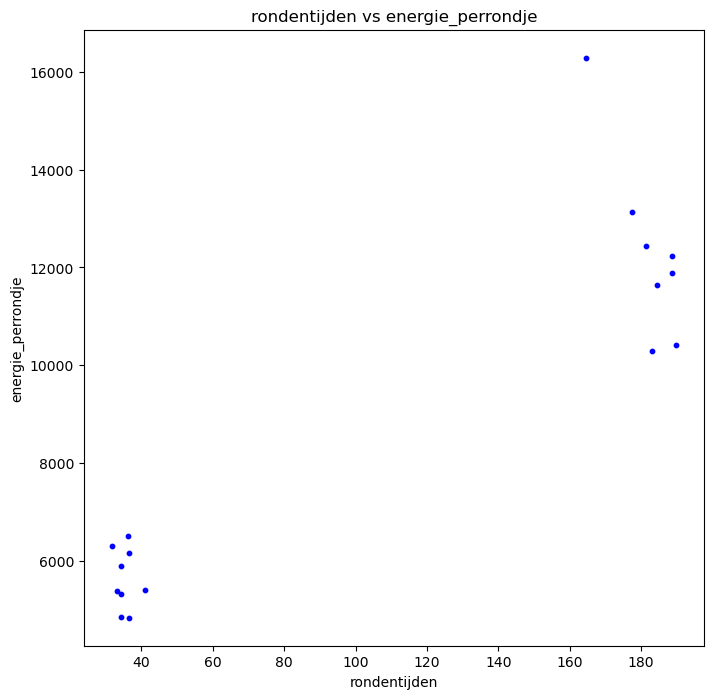

In [9]:
# Calculate the energy per lap and assign to 'energie_perrondje' column
energie_perrondje = lib.delta_rondje_berekenen(rechtestuk_rijen, data_file_motordriver,'Energie geleverd aan de motor sinds reset (J)')
aangepaste_df["energie_perrondje"] = energie_perrondje  # Directly assign the array to the column
rondetijden = lib.delta_rondje_berekenen(rechtestuk_rijen, data_file_motordriver, 'Dataloggertijd, in s')
# Assign the lap times ('rondetijden') to the DataFrame
aangepaste_df["rondentijden"] = rondetijden  # Directly assign the array to the column

# Define the columns for the x and y axes
y_col = "energie_perrondje"
x_col = "rondentijden"

# Print or inspect the DataFrame if needed
print(aangepaste_df)

# Plot the data using your plotting function
lib.plot_data(aangepaste_df, x_col, y_col)


In [76]:
delta_vermogen_per_rondje = np.array([])
vermogen_per_rondje = np.array([])
for w in range(len(finish_rijen)-1):
    delta_vermogen = (merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w+1]] - 
                merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w]])
    delta_vermogen_per_rondje = np.append(delta_vermogen_per_rondje,delta_vermogen)
print(delta_vermogen_per_rondje)

for r in range(len(finish_rijen)-1):
    start = finish_rijen[r]
    eind = finish_rijen[r+1]
    vermogen = merged_df["Vermogen geleverd aan de motor (W)"].iloc[start:eind].sum()
    vermogen_per_rondje = np.append(vermogen_per_rondje,vermogen)
print(vermogen_per_rondje)    

[         nan 146.20000651   5.75262783 -45.42909842  15.27151476
   2.3317139    9.4330694 ]
[  -98.56982432  9401.84355568 22895.8761813  15271.08384332
 21219.02636761 17675.99837776 22629.93194487]


[186406. 190537. 209478. 213105. 234212. 238140. 259880. 263819. 284193.
 287975. 309006. 312888. 333483. 337587. 359110. 363725. 385116. 389256.]


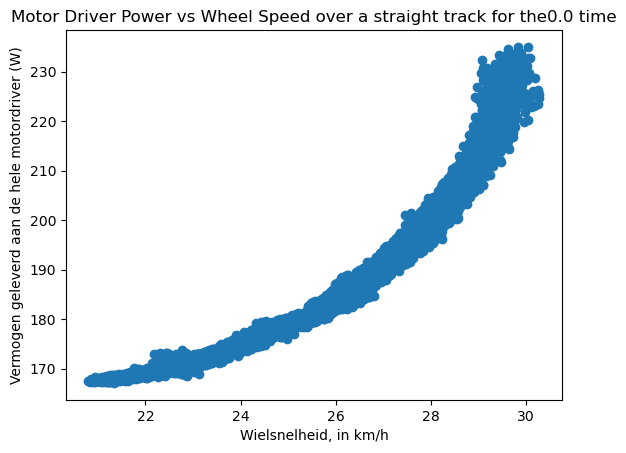

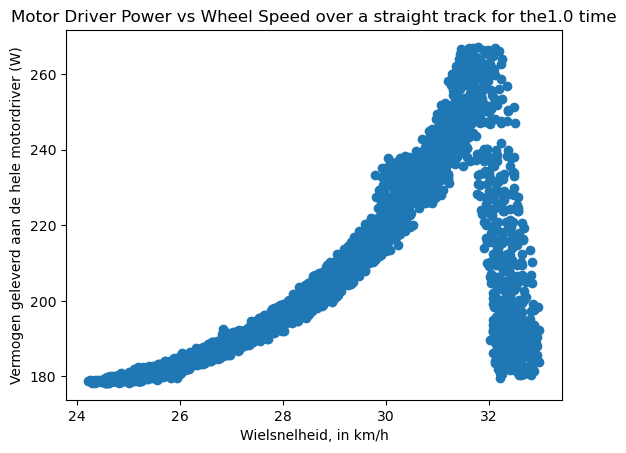

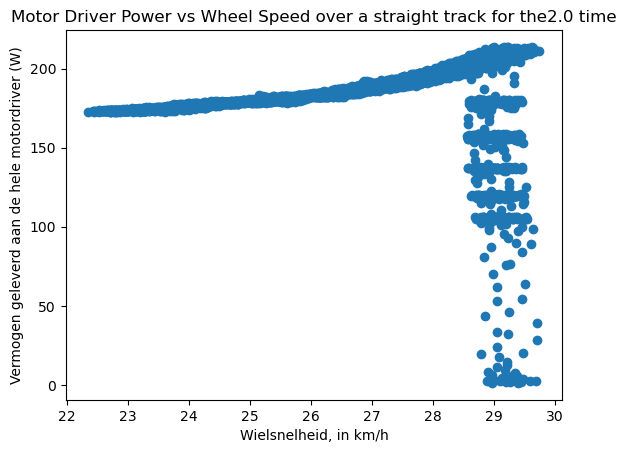

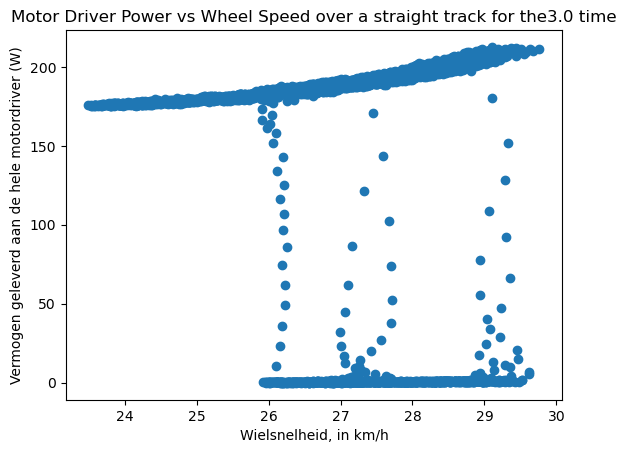

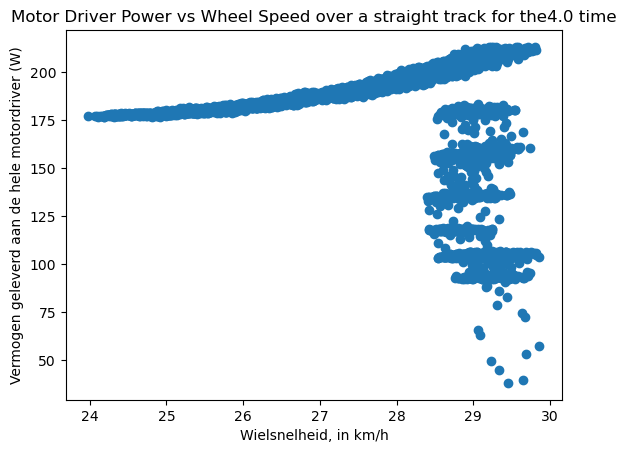

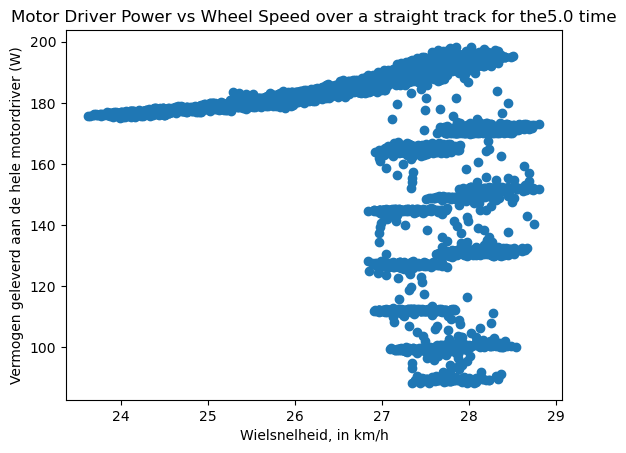

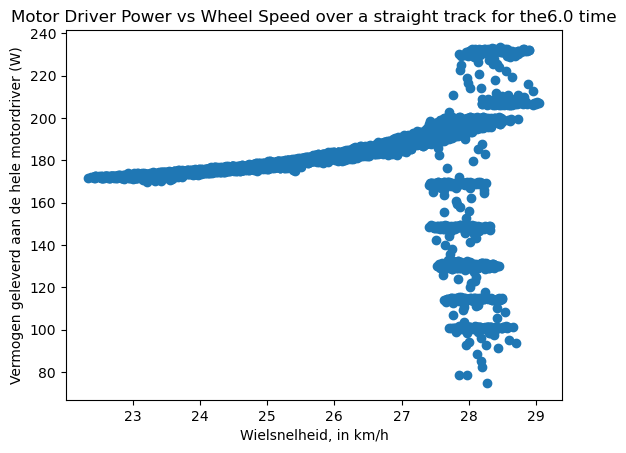

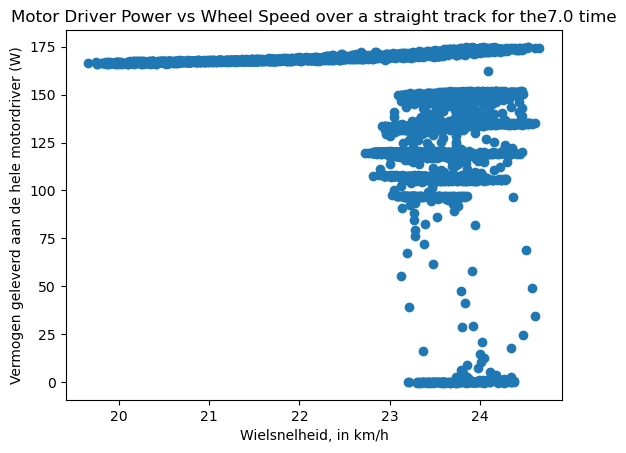

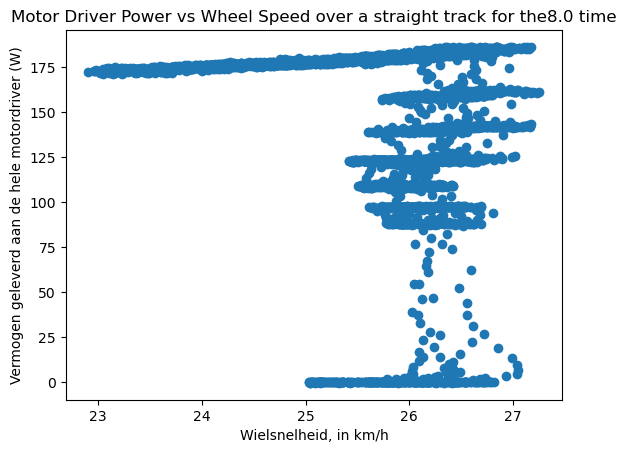

In [94]:
print(rechtestuk_rijen)
%matplotlib inline
# data_file_motordriver = data_file_motordriver[data_file_motordriver["Wielsnelheid, in km/h"] != 0]
# data_file_motordriver = data_file_motordriver[data_file_motordriver["Vermogen geleverd aan de hele motordriver (W)"] != 0]
for i in range(0, len(rechtestuk_rijen), 2):
    row_index_1 = int(rechtestuk_rijen[i])
    row_index_2 = int(rechtestuk_rijen[i+1])
    
    # Plotting the data between the pairs
    plt.figure(i)
    plt.scatter(data_file_motordriver["Wielsnelheid, in km/h"].iloc[row_index_1:row_index_2],data_file_motordriver["Vermogen geleverd aan de hele motordriver (W)"].iloc[row_index_1:row_index_2], )
    #legend = f"{i}e rechte stuk"
    plt.ylabel("Vermogen geleverd aan de hele motordriver (W)")
    plt.xlabel("Wielsnelheid, in km/h")
    plt.title(f"Motor Driver Power vs Wheel Speed over a straight track for the{i/2} time")
#plt.legend()
plt.show()


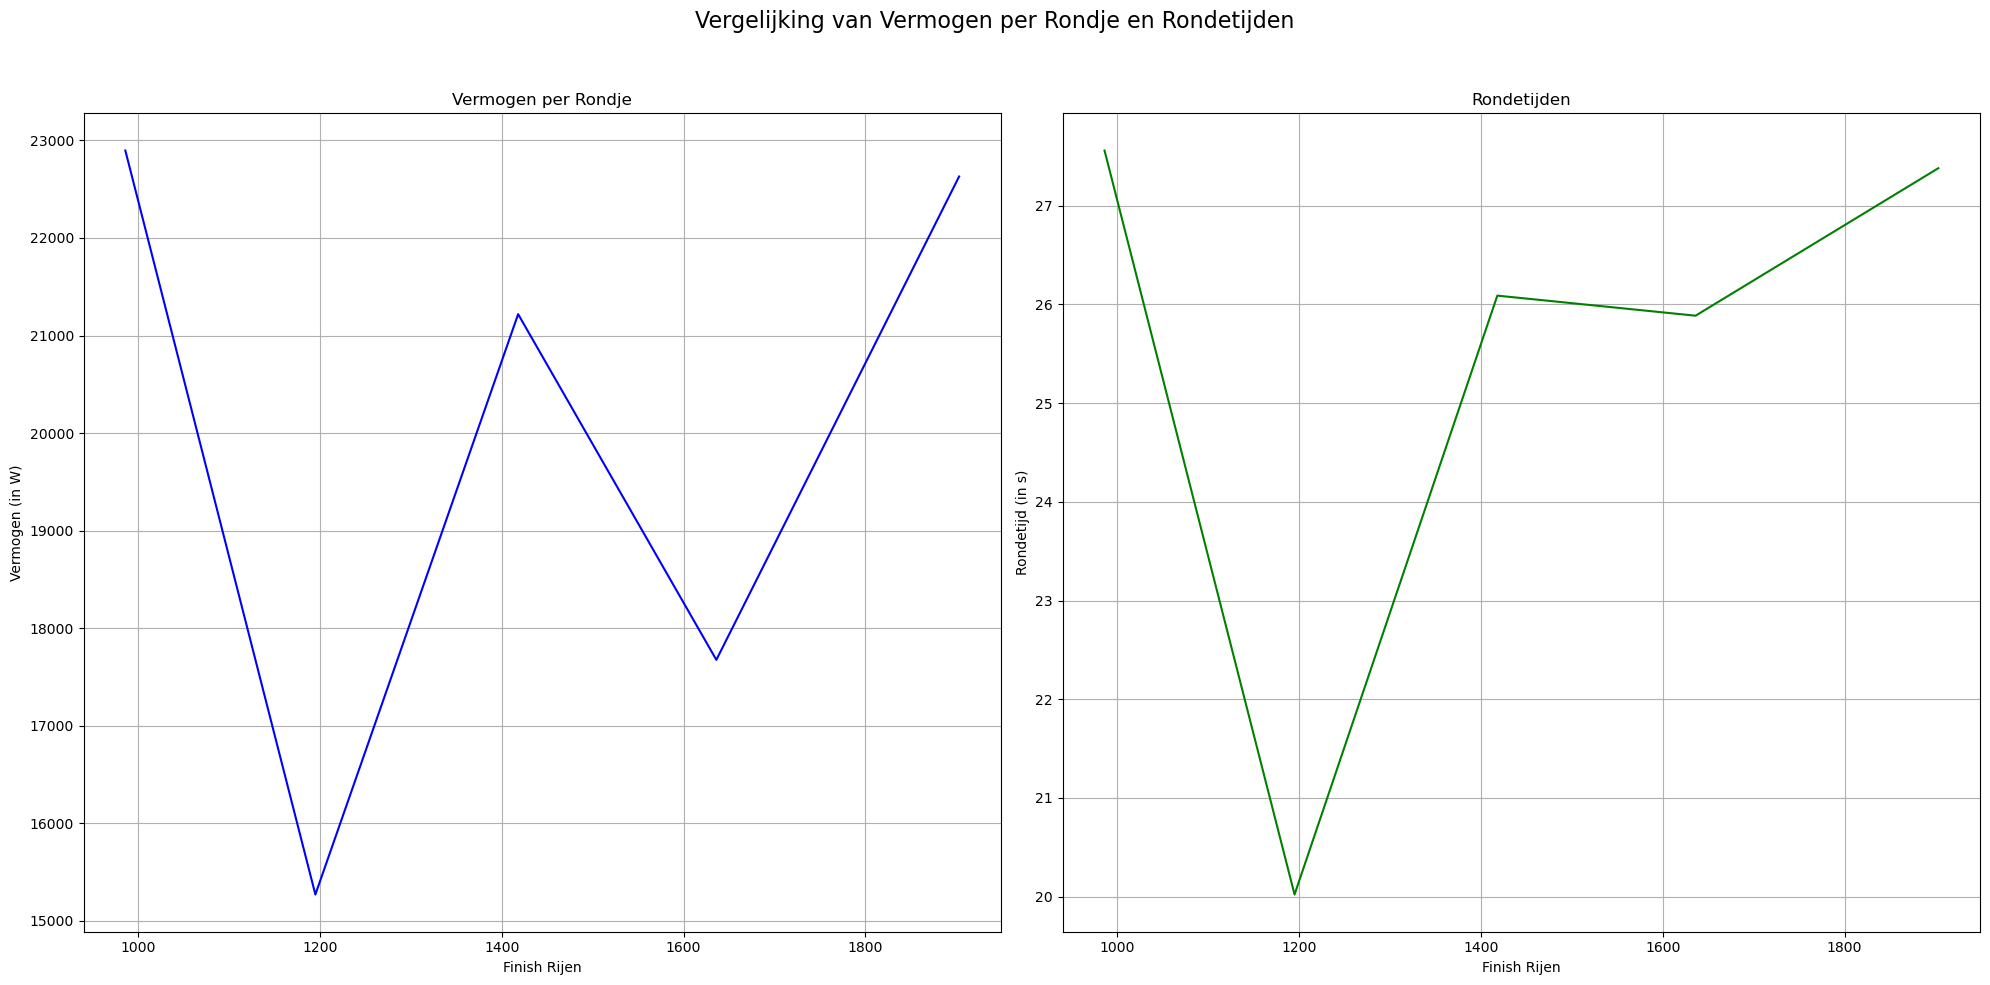

In [93]:
plt.figure(figsize=(20,10))

# First subplot: Vermogen per Rondje
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(finish_rijen[3:], vermogen_per_rondje[2:], color='blue')
plt.title('Vermogen per Rondje')  # Set the title for the first subplot
plt.xlabel('Finish Rijen')  # Set the x-axis label
plt.ylabel('Vermogen (in W)')  # Set the y-axis label
plt.grid(True)  # Add gridlines

# Second subplot: Rondetijden
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(finish_rijen[3:], gemiddelde[2:], color='green')
plt.title('Rondetijden')  # Set the title for the second subplot
plt.xlabel('Finish Rijen')  # Set the x-axis label
plt.ylabel('Rondetijd (in s)')  # Set the y-axis label
plt.grid(True)  # Add gridlines

# Show the plots
plt.suptitle('Vergelijking van Vermogen per Rondje en Rondetijden', fontsize=16)  # Add a main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so it doesn't overlap
plt.show()


In [14]:
%matplotlib qt
# Assuming 'filter' is your DataFrame and 'xas', 'yas', 'colorbar' are the column names
filter = data_file_master.iloc[ceil(len(data_file_master)*0.1):ceil(len(data_file_master)*0.3)]
plt.figure(figsize=(20, 20))
plt.scatter(merged_df[xas], merged_df[yas])
plt.title('GPS data vs speed')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

# Coordinates for the box
lat_min, lat_max = 2.4225, 2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 
# Plotting the box
plt.plot([lat_min, lat_max, lat_max, lat_min, lat_min],
         [lon_min, lon_min, lon_max, lon_max, lon_min],
         color='red', linestyle='--', linewidth=2)
for i in range(len(merged_df)):
    lat = merged_df[yas].iloc[i]
    lon = merged_df[xas].iloc[i]

    # Voeg de rijindex toe als tekst in de plot
    plt.text(lon, lat, str(i), fontsize=10, color='black')
plt.scatter(merged_df[xas].iloc[finish_rijen], merged_df[yas].iloc[finish_rijen], 
            color='red', label="Finish rijen", s=100, edgecolor='black')

plt.grid()
plt.show()

IndexError: positional indexers are out-of-bounds

In [47]:
%matplotlib qt
import matplotlib.pyplot as plt
from math import ceil

#data_file_motordriver = data_file_motordriver.iloc[ceil(len(data_file_motordriver)*0.3):ceil(len(data_file_motordriver)*0.5)]

yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
colorbar = 'Wielsnelheid, in km/h'
data_file_motordriver = data_file_motordriver[data_file_motordriver[xas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[yas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[colorbar] != 0]
# Assuming 'data_file_motordriver' is your DataFrame and 'xas', 'yas' are the column names
# Filter rows from the dataset for the specific range
filter = data_file_master.iloc[ceil(len(data_file_master)*0.1):ceil(len(data_file_master)*0.3)]

# Create a figure for the scatter plot
plt.figure(figsize=(20, 20))

# Plot the data (replace merged_df with data_file_motordriver)
plt.scatter(data_file_motordriver[xas], data_file_motordriver[yas], c=data_file_motordriver[colorbar])

# Set the plot title and axis labels
plt.title('GPS data vs speed')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Add a colorbar with a label for the speed in km/h (assuming you have speed data in 'speed' column)
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

# Coordinates for the box (adjust these values as per your requirements)

lat_min, lat_max = -2.4225, -2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 

# Plotting the box (red dashed lines)
plt.plot([lat_min, lat_max, lat_max, lat_min, lat_min],
         [lon_min, lon_min, lon_max, lon_max, lon_min],
         color='red', linestyle='--', linewidth=2)
lat_min2, lat_max2 = -2.5488, -2.5478
lon_min2, lon_max2 = 0.001+4.34633e3,0.008+4.34633e3 

plt.plot([lat_min2, lat_max2, lat_max2, lat_min2, lat_min2],
         [lon_min2, lon_min2, lon_max2, lon_max2, lon_min2],
         color='red', linestyle='--', linewidth=2)
# Loop through the DataFrame and annotate each point with its index
for i in range(len(data_file_motordriver)):
    lat = data_file_motordriver[yas].iloc[i]
    lon = data_file_motordriver[xas].iloc[i]

    # Add the row index as text to the plot
    #plt.text(lon, lat, str(i), fontsize=10, color='black')
# finish_rijen = finish_rijen.astype(int)
# 
# # If you have specific finish rows, plot those (replace 'finish_rijen' with the actual list of rows)
# plt.scatter(data_file_motordriver[xas].iloc[finish_rijen], data_file_motordriver[yas].iloc[finish_rijen], 
#             color='red', label="Finish rijen", s=100, edgecolor='black')

# Enable grid
plt.grid()

# Show the plot
plt.show()
